<a href="https://colab.research.google.com/github/teazaw/MAT421-Applied-Computational-Methods/blob/main/MAT421_Final_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAT421 Final Project: Predicting Breast Cancer Diagnosis Using Machine Learning Classification Models**

## **Introduction to the Problem:**

Breast cancer is one of the most common cancers worldwide, as 1 in 8 women develop breast cancer in their lifetime (NBCF 2019). It represents a significant public health challenge, contributing to high morbidity and mortality rates, particularly when detected at later stages. Therefore, early detection and accurate diagnosis are crucial in improving survival rates.  Traditional diagnostic techniques such as fine needle aspiration (FNA) cytology provide a minimally invasive way to collect cell samples from breast masses, but accurate interpretation can be complex and subjective (Cleveland Clinic 2023).

**Machine learning (ML) offers an opportunity to develop automated diagnostic tools to assist clinicians in identifying malignant versus benign tumors based on FNA-derived features.** By leveraging advanced computational algorithms, ML models can identify patterns and relationships in large datasets that may not be readily apparent to human observers. Thus, clinicans are able to make more informed decisions regarding their patients' treatment plans.

**Research Question: Can machine learning classification models accurately predict breast cancer diagnosis (malignant or benign) based on FNA-derived features?**

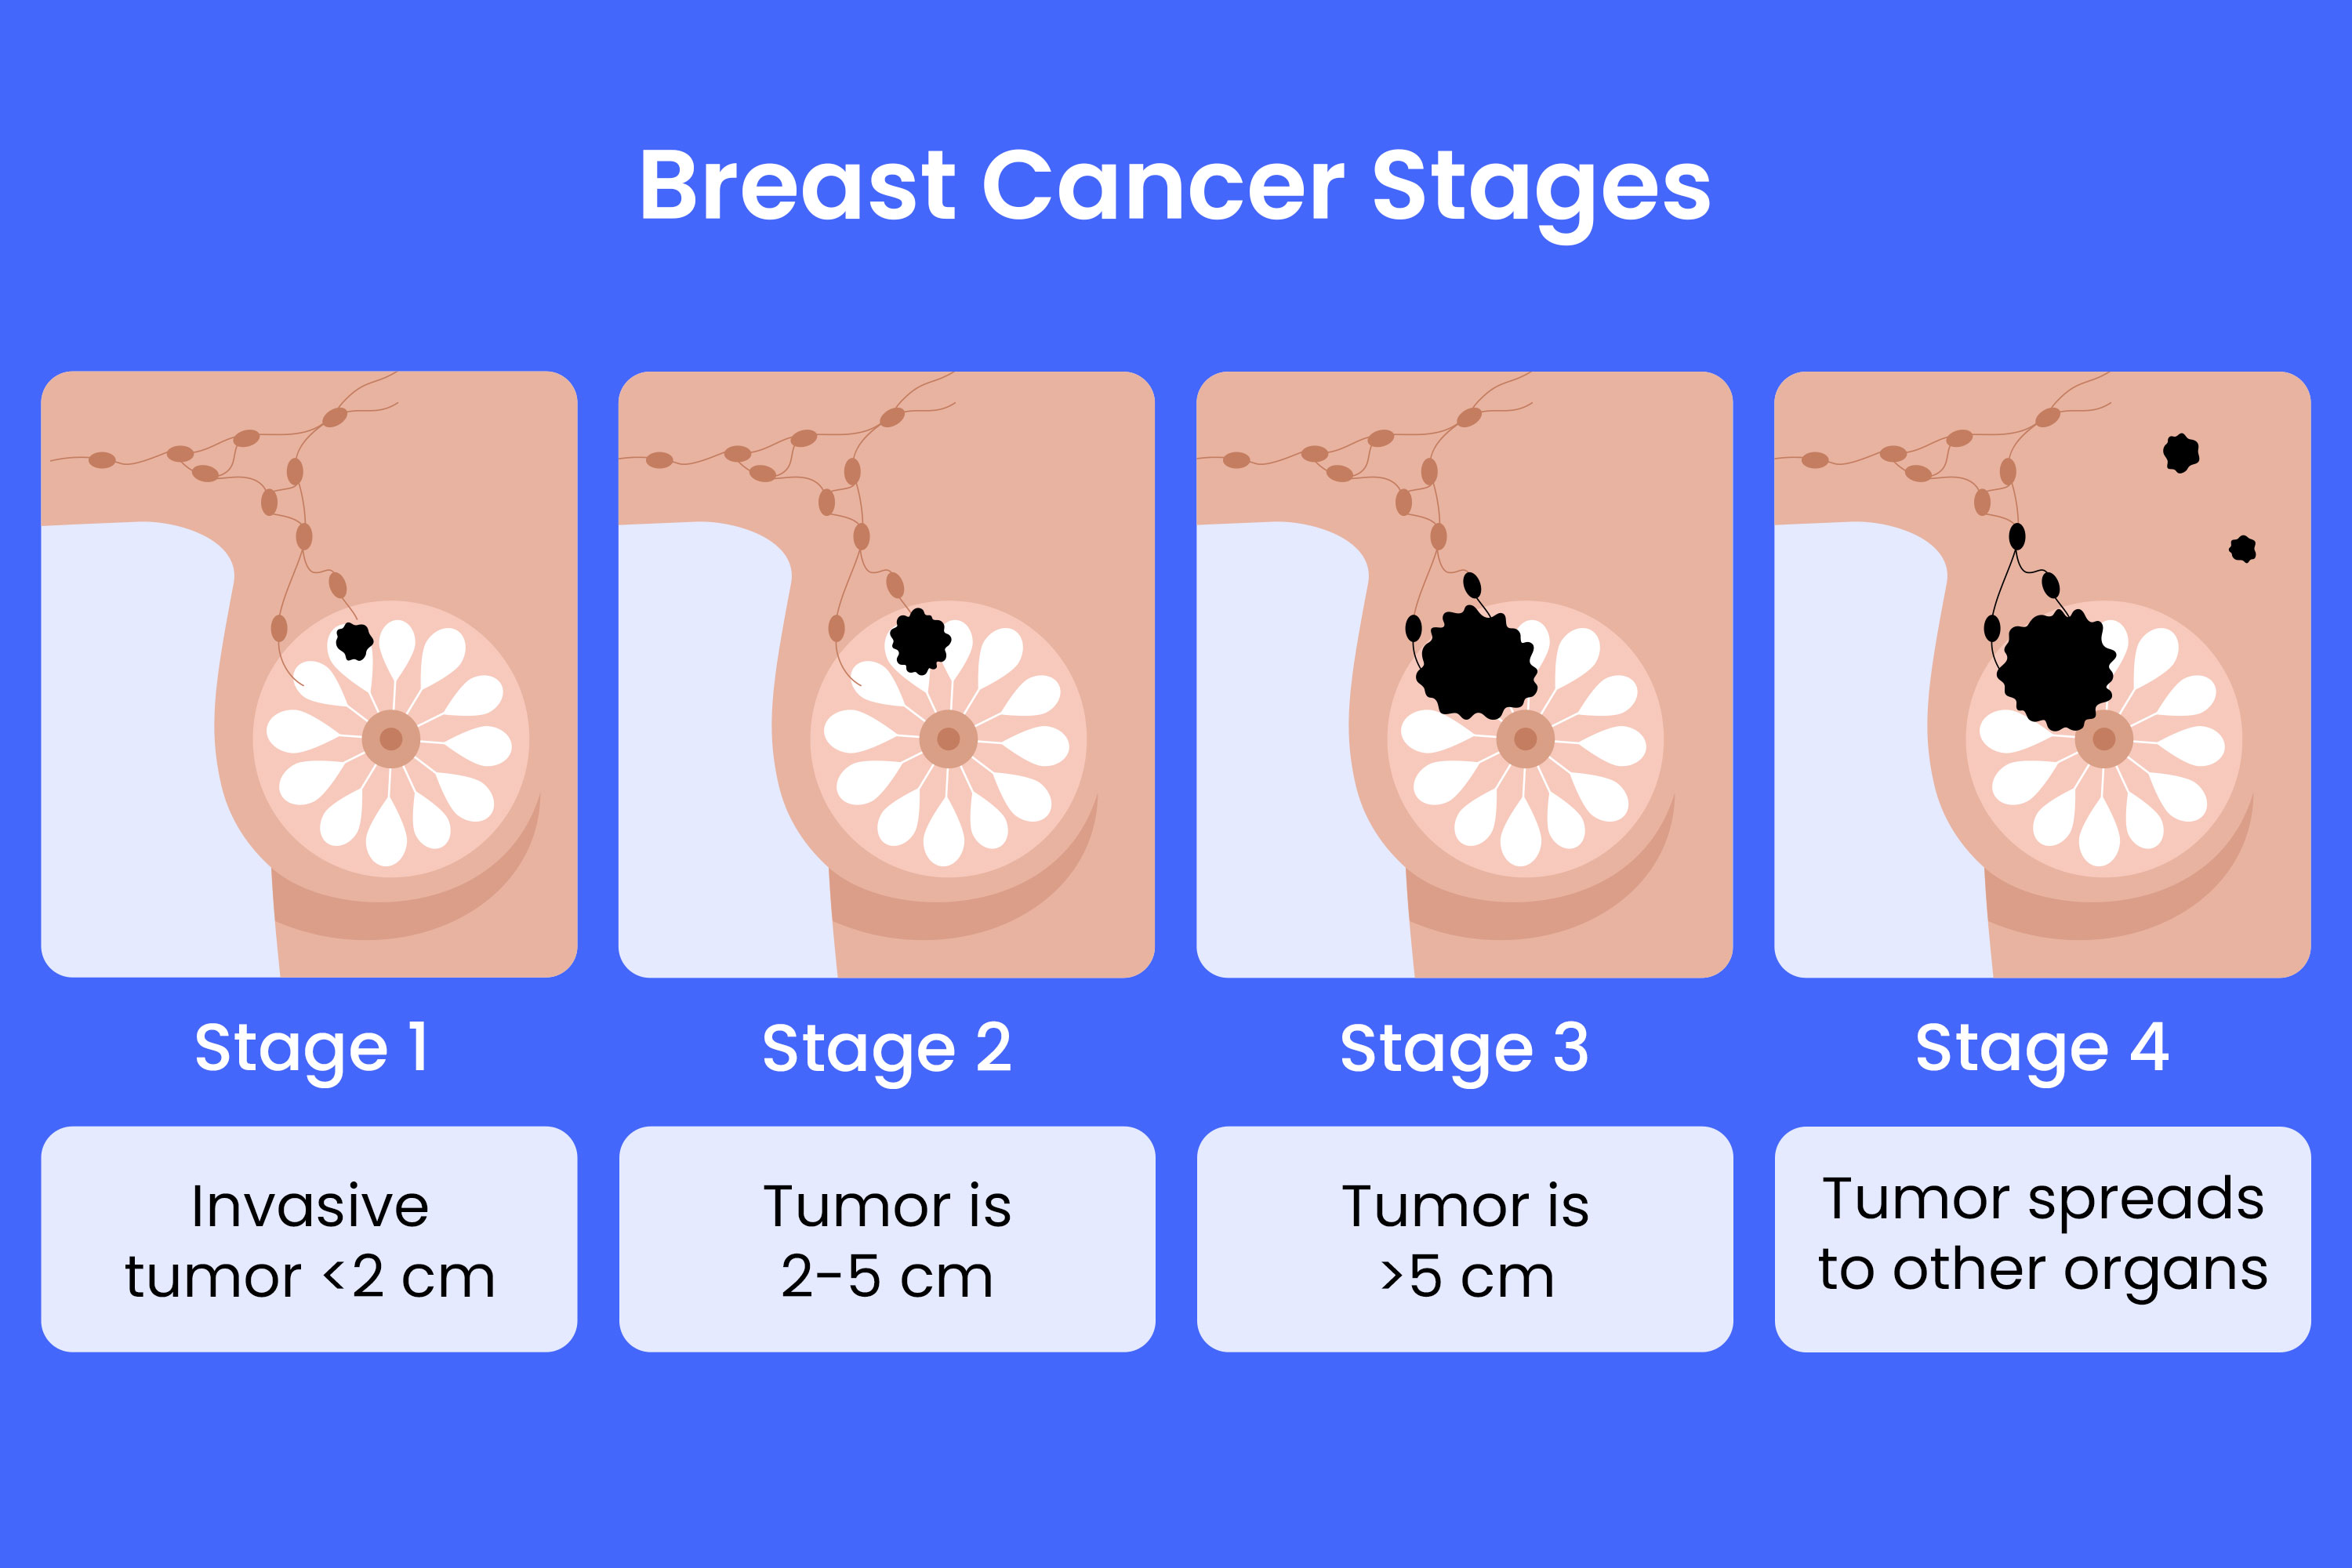

## **Related Work:**

Belciug et al. performed a 2010 study that compared the performance of cluster network, Self Organizing Map and K-means to detect breast cancer using the data contained in the Wisconsin Prognostic Breast Cancer (WPBC) dataset, determining that the K-means model performed the best (Belciug et al. 2010). Chaurasia and Pal performed a similar analysis on a breast cancer dataset sourced from the University Medical Center at the Institute of Oncology in Ljubljana, Yugoslavia, where they compared the performance of artificial neural networks, logistic regression and dyadic decision trees when predicting breast cancer recurrence (Chaurasia and Pal 2014).

While these studies explored clustering and prediction models,
this project extends the work by comparing modern classifiers (Random Forest, XGBoost, SVM, KNN, Logistic Regression) using the WDBC dataset. We focus on early diagnosis and the balance of performance with interpretability.



## **Math Methods-Proposed Methology/Models:**

**This project proposes a comparative study of several classification models to predict breast cancer diagnosis using the Wisconsin Breast Cancer (Diagnostic) Data Set.**

Classification machine learning models are types of algorithms used to categorize or "classify" input data into predefined classes or labels. In supervised learning, classification models are trained using labeled datasets, where the correct output (class label) is known, and the model learns patterns to predict the label for new, unseen data.

**The models for this analysis are as follows:**
1. **Logistic Regression**

*   Logistic regression models the probability that a given input belongs to a certain class. The output is modeled as P(Y=1|X)=1/(1+EXP(-(w^T x + b )))

2. **Random Forest Classifier**


*   Random Forests are a group of decision trees that make decisions by majority voting across trees.


3. **Support Vector Machine**


*   SVM finds the optimal hyperplane separating classes by maximizing the margin between support vectors.

4. **K-Nearest Neighbors**


*   KNN is a non-parametric method where classification is based on the majority class among the k closest points to a query point using a distance metric (often Euclidean distance).


5. **Gradient Boosting (XGBoost)**


*   XGBoost builds an ensemble of weak learners (decision trees) sequentially, where each new tree corrects the errors of the previous ones by optimizing a loss function.


**Dataset Characteristics**


Along with ID number and diagnosis as being malignant or benign for each entry, the dataset has the following features computed for each cell nucleus.
1.  radius
2.  texture
3.  perimeter
4.  area
5.  smoothness
6.  compactness
7. concavity
8. concave points
9. symmetry
10. fractal dimension

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. There are 546 samples included in this dataset.



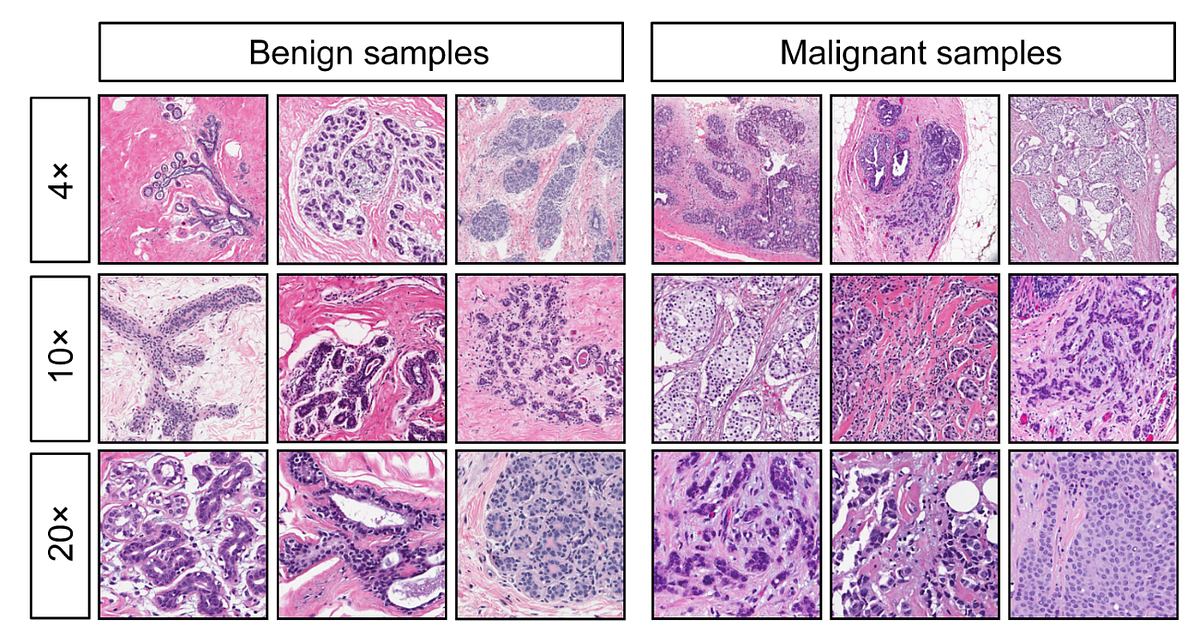

# **Implementation**

Firstly, an **exploratory data analysis** was conducted on the dataset to visualize trends in the variables and gain an understanding of the general landscape.

The amount of malignant and benign diagnoses were calculated and visualized. We found that there are more benign than malignant tumors in this dataset. A correlation heatmap was generated to show how strongly each feature is related to every other feature in the dataset.

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

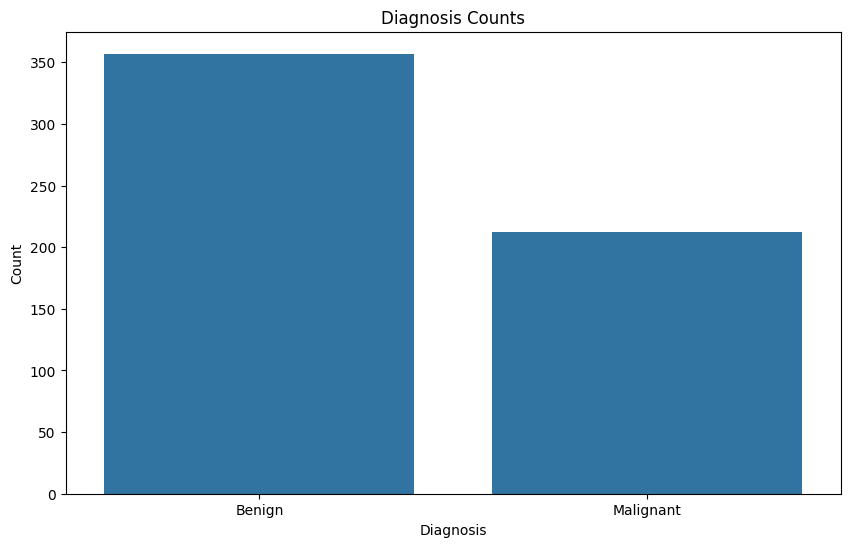

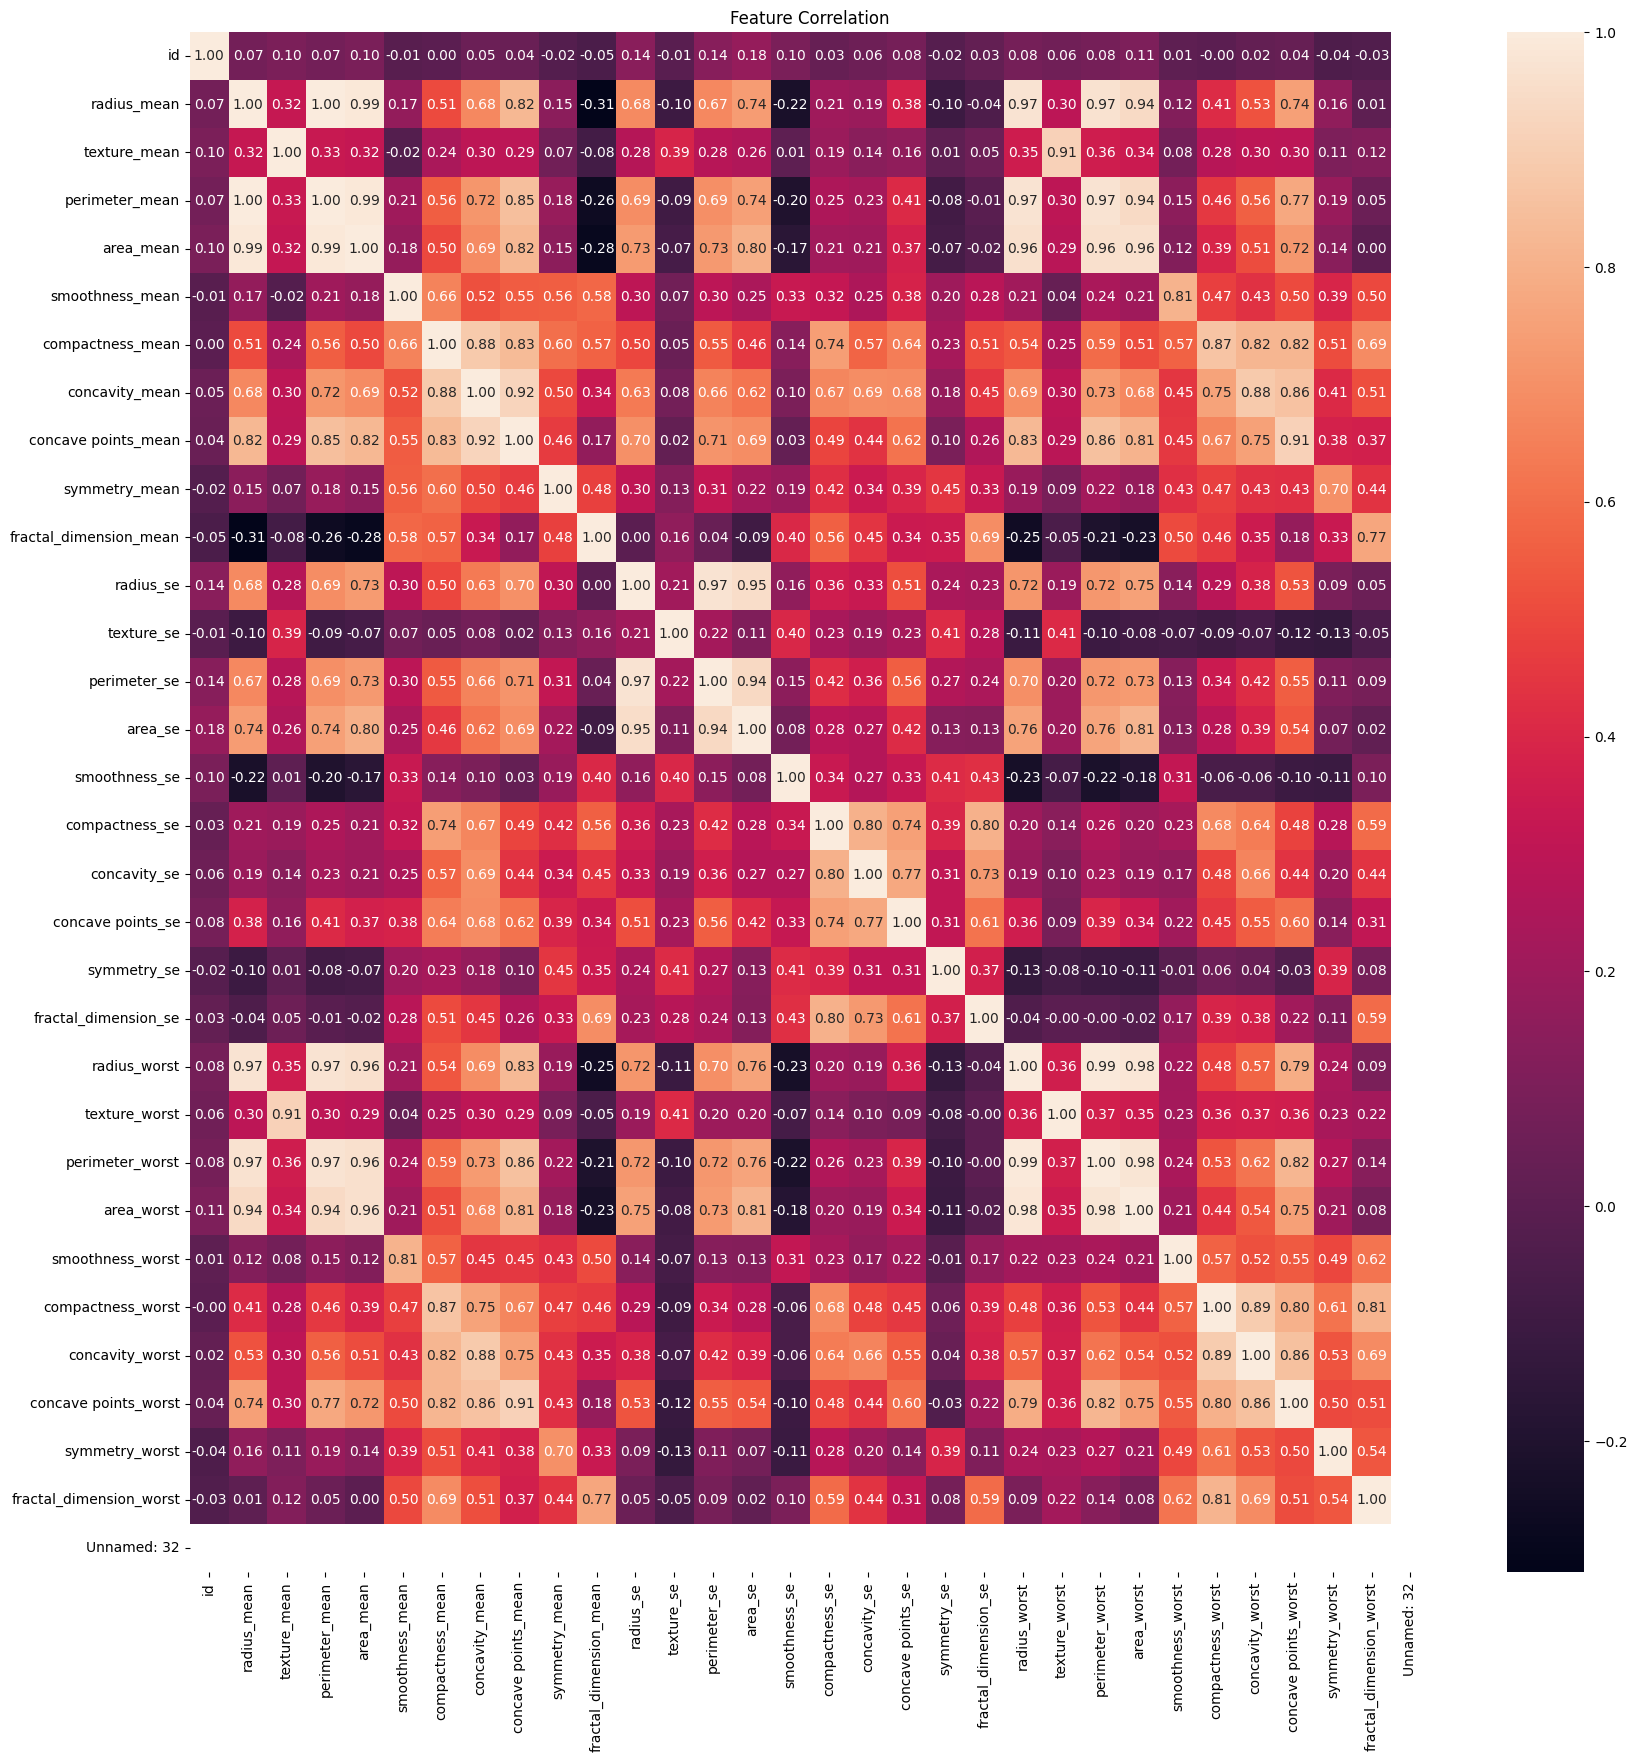

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Load dataset
data = pd.read_csv('data.csv')

#Data Overview
print(data.head())
print(data.info())
print(data.isnull().sum())

# Graph the types of diagnoses
data['diagnosis'] = data['diagnosis'].map({'M': 'Malignant', 'B': 'Benign'})

plt.figure(figsize=(10,6))
sns.countplot(x='diagnosis', data=data, order=['Benign', 'Malignant'])
plt.title('Diagnosis Counts')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(20,20))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f')
plt.title('Feature Correlation')
plt.show()


**The selected models were imposed on the data.** Before this, the data was featured scaled, which means transforming the data so that all the features have similar ranges. This is important because, without scaling, features with bigger values dominate distance-based models.


**The following performance metrics were used to evaluate the models:**
1. Accuracy- measures how often the model is correct overall
2. Precision-measures the accuracy of all the positive predictions
3. Recall- measures the accuracy of finding all the actual malignant cases
4. F1- a tradeoff between precision and recall
5. ROC AUC- measures how well the model separates the two classes (malignant vs benign) at all classification thresholds

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, roc_auc_score

data = pd.read_csv('data.csv')
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})
X = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = data['diagnosis']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Training testing split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training of the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    acc = model.score(X_test, y_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_proba)

    results[name] = {
        'Accuracy': acc,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-score': report['1']['f1-score'],
        'ROC AUC': auc
    }

# Results dataframe with selected performance measures
results_df = pd.DataFrame(results).T
print(results_df)
best_model_name = results_df['Accuracy'].idxmax()
print(f"Best Model: {best_model_name}")

                     Accuracy  Precision    Recall  F1-score   ROC AUC
Logistic Regression  0.973684   0.976190  0.953488  0.964706  0.997380
Random Forest        0.964912   0.975610  0.930233  0.952381  0.994759
SVM                  0.973684   0.976190  0.953488  0.964706  0.997380
KNN                  0.947368   0.930233  0.930233  0.930233  0.981657
XGBoost              0.956140   0.952381  0.930233  0.941176  0.990829
Best Model: Logistic Regression


The algorithm with the best accuracy and precision, which was logistic regression, was explored further through the generation of a **confusion matrix and an ROC curve.**

The ROC curve visually displays the area under the curve (AUC). An AUC of 0.5 means that the model is no better than random chance, while an AUC closer to 1 means that the model is performing well.

Best Model: Logistic Regression


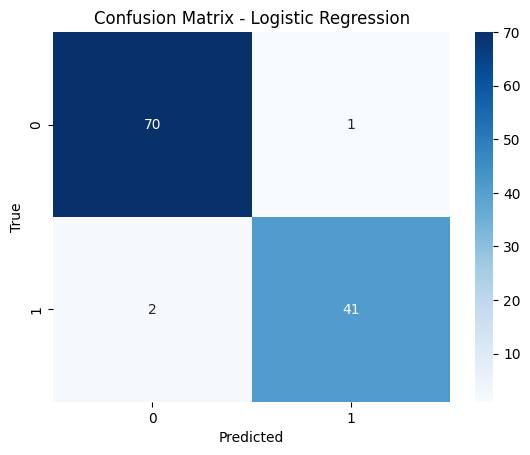

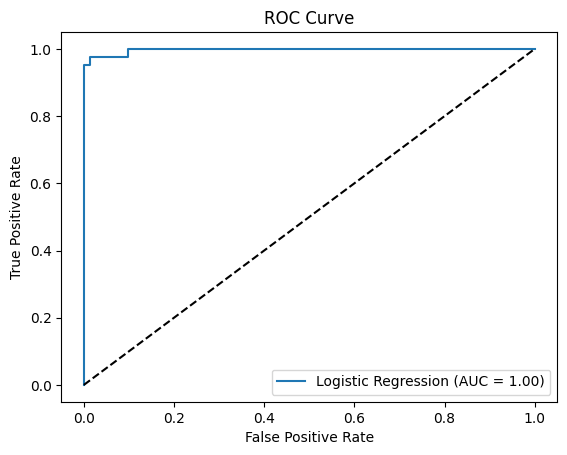

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve


results_df = pd.DataFrame(results).T

best_model_name = results_df['Accuracy'].idxmax()
print(f"Best Model: {best_model_name}")

best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

#Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {results_df.loc[best_model_name, "ROC AUC"]:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# **Experiment Setup and Results Discussion**

All 4 models performed relatively well in terms of their predictive power, with no model exhibiting less than 95% accuracy and 93% precision.

**Specifically, our results show that**:

*   Logistic Regression and SVM achieved the highest accuracy (~97%), demonstrating that linear and margin-based methods are effective.
*   Random Forest performed slightly worse in terms of accuracy (~96.5%), but it was still one of the better performing models, which demonstrates that robust results can be derived from ensemble learning.
*   XGBoost achieved a slightly lower accuracy of ~95.6%.
*   KNN lagged slightly behind with an accuracy of ~94.7%.


The confusion matrix of the top performing algorithm, which was logistic regression, showed very few false positives or false negatives, which is promising when considering this algorithm for medical screening purposes.

**Comparison of Model Performances**:

Logistic Regression achieved the best overall results in both accuracy (97.37%) and ROC AUC (0.997), demonstrating its strength in complex medical datasets when features are well-scaled. Support Vector Machine (SVM) matched Logistic Regression in terms of accuracy and AUC. This suggests that its ability to create flexible decision boundaries is highly effective. Random Forest was very close behind, with 96.5% accuracy and slightly lower AUC (0.996).Its ensemble approach successfully captured feature interactions, though slightly less precise compared to SVM and Logistic Regression.XGBoost achieved 95.6% accuracy, reflecting the power of boosting techniques, but it did not outperform simpler models like Logistic Regression and SVM in this dataset.K-Nearest Neighbors (KNN) performed the least well among the models (94.7% accuracy). While still strong, KNN is more sensitive to noise and feature scaling, which likely contributed to its relatively lower performance.


**Comparison with Prior Related Work:**

Belciug et al. (2010) found that K-means clustering worked best among clustering methods for predicting breast cancer, emphasizing the effectiveness of unsupervised approaches on the WPBC dataset.However, our results demonstrate that supervised learning models (Logistic Regression, SVM, Random Forest) achieve higher predictive accuracy (up to 97.37%) when labeled data is available.

Chaurasia and Pal (2014) found that artificial neural networks outperformed logistic regression and decision trees for predicting breast cancer recurrence. In contrast, in our work on the WDBC dataset, Logistic Regression slightly outperformed ensemble methods like Random Forest and boosting techniques. This discrepancy may be due to differences in dataset characteristics, the features measured, and preprocessing steps such as scaling. Another important thing to note is that we did not imposed neural networks on our dataset, which may be a productive next step in this analysis.


In summary, even though ensemble and boosting methods are powerful,
simpler linear models like Logistic Regression, when paired with proper preprocessing, can outperform more complex methods on structured and well-behaved datasets like the data used in this analysis.






# **Conclusion**
**This project demonstrates that machine learning classification models
can accurately predict breast cancer diagnoses based on FNA-derived features.** Logistic Regression and SVM models achieved the highest performance, which exceeded 97% accuracy. Therefore, we can conclude that machine learning models are able to accurately predict whether a breast cancer tumor is malignant or benign.

**Future Work**

Future work could explore several avenues to enhance the applicability and reliability of these models:


*  **Deep Learning Approaches on Larger Datasets**: While this study focused on traditional machine learning models, deep learning techniques, especially convolutional neural networks (CNNs), have shown great promise in other medical imaging tasks. Applying deep learning methods to larger datasets could further improve model accuracy and allow for the discovery of more complex patterns and correlations that might be missed by simpler models.
*   **Explainable AI Methods**: One of the limitations of many machine learning models is their lack of interpretability. Incorporating explainable AI (XAI) methods would provide greater transparency in how models arrive at their predictions. This could increase trust among clinicians and provide valuable insights into the biological markers that are most indicative of malignancy or benignity, which is crucial for clinical adoption because of increased trust among doctors and patients.
*   **Integration with Clinical Workflows for Real-World Testing**: To ensure the practicality of machine learning models in real-world healthcare settings, integration with existing clinical workflows is important. Testing the models in actual clinical environments would help refine their performance and usability, ensuring they are not only accurate but also easy to use by medical professionals.



**ML-assisted diagnosis tools have the potential to significantly enhance early detection and improve patient outcomes.** The ability to automate the analysis of FNA-derived features can significantly aid pathologists in their decision-making, which can provide a faster and more consistent diagnostic process. By leveraging large datasets and more complex models, we can expand upon the analysis conducted in this paper, creating machine learning models that can contribute to more reliable and scalable diagnostic systems. This ensures that more patients can receive timely and accurate diagnoses.

# **References**
Belciug et al., 2010. “Clustering-Based Approach for Detecting Breast Cancer Recurrence,” November, 533–38. https://doi.org/10.1109/isda.2010.5687211.


Chaurasia, Vikas, and Pal, Saurabh. 2017. “Data Mining Techniques: To Predict and Resolve Breast Cancer Survivability.” Ssrn.com. June 29, 2017. https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2994925.


Cleveland Clinic. 2023. “Fine-Needle Aspiration (FNA) Uses a Needle and Syringe to Get a Cell Sample from a Suspicious Lump or an Abnormal Area of Your Body. It’s Minimally Invasive.” Cleveland Clinic. August 25, 2023. https://my.clevelandclinic.org/health/diagnostics/17872-fine-needle-aspiration-fna.


‌
NBCF. 2019. “Breast Cancer Facts & Stats 2024 - Incidence, Age, Survival, & More.” National Breast Cancer Foundation. August 28, 2019. https://www.nationalbreastcancer.org/breast-cancer-facts/#:~:text=1%20in%208%20women%2C%20or,breast%20cancer%20in%20their%20lifetime.&text=Breast%20cancer%20is%20the%20most,women%2C%20except%20for%20skin%20cancers.&text=It%20is%20estimated%20that%20in,diagnoses%20will%20be%20breast%20cancer.







Dataset:
UCI Machine Learning. 2016. “Breast Cancer Wisconsin (Diagnostic) Data Set.” Kaggle.com. 2016. https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download.

‌